In [122]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [123]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

import MuC.detgeo as dg
from MuC import collider_tools as col
from MuC import detector_tools as det
from MuC import plot_tools as pt

from MuC.detgeo import SimulateDetector

In [124]:
import MuC
from MuC.detector_geometries import det_v2

In [125]:
design = dg.SimulateDetector(design=col.muc_10tev, N_evals = 1e4, save_mem=False)
sim = design.run()
with open(f'gen_data/MH_test_{design.design["short_name"]}.pkl', 'wb') as f:
    pickle.dump(sim, f)

MuC 10 TeV parameter set with 1.000e+04 evaluations .
1.792e+04 MC generations; took 1.72 s.
Simulating muon decays for nue
Simulating muon decays for numubar
Simulating muon decays for nuebar
Simulating muon decays for numu
Successfully simulated neutrino event rates within Det v2:
MuC 10 TeV ($\mu^+ \mu^-$) at L = 300.00 m.
Total count: 5.30e+11 events; took 0.395 s (numba pre-compilation needed).



In [11]:
NEVENTS = 1e5

# col_designs = [col.muc_3tev, col.muc_10tev, col.mut_2tev, col.mut_2tev_pol]
col_designs = [col.muc_1p5tev, col.muc_3tev, col.muc_10tev, col.muc_30tev, col.mut_2tev, col.mut_2tev_pol]
col_sims = []
for design in col_designs:
    sim = dg.SimulateDetector(design=design, N_evals = NEVENTS, save_mem=False)
    col_sims.append(sim.run())

MuC 1.5 TeV parameter set with 1.000e+05 evaluations .
1.876e+05 MC generations; took 3.07 s.
Simulating muon decays for nue
Simulating muon decays for numubar
Simulating muon decays for nuebar
Simulating muon decays for numu
Successfully simulated neutrino event rates within Det v2:
MuC 1.5 TeV ($\mu^+ \mu^-$) at L = 50.00 m.
Total count: 2.90e+11 events; took 5.67 s (numba pre-compilation needed).

MuC 3 TeV parameter set with 1.000e+05 evaluations .
1.875e+05 MC generations; took 3.09 s.
Simulating muon decays for nue
Simulating muon decays for numubar
Simulating muon decays for nuebar
Simulating muon decays for numu
Successfully simulated neutrino event rates within Det v2:
MuC 3 TeV ($\mu^+ \mu^-$) at L = 200.00 m.
Total count: 2.20e+11 events; took 0.887 s.

MuC 10 TeV parameter set with 1.000e+05 evaluations .
1.876e+05 MC generations; took 3.06 s.
Simulating muon decays for nue
Simulating muon decays for numubar
Simulating muon decays for nuebar
Simulating muon decays for numu


## Saving simulations to file

In [12]:
version = 'MH_test'
for design, sim in zip(col_designs, col_sims):
    with open(f'gen_data/{version}_{design["short_name"]}.pkl', 'wb') as f:
        pickle.dump(sim, f)

Text(0.5, 1.0, 'Neutrino fractional energy')

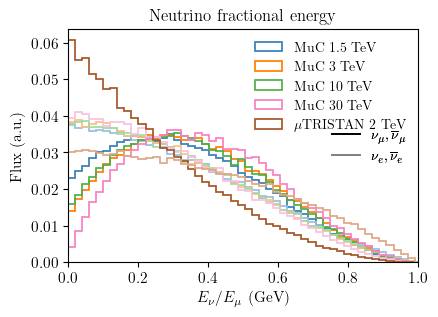

In [16]:
bins = np.linspace(0,2, 100)

light_factor = 0.5
LW=1.25

fig, ax = pt.std_fig()
def plot_curve(i):
    ax.hist(col_sims[i].cco.pnumu[:,0]/col_sims[i].design['beam_p0'], weights = col_sims[i].cco.weights, bins = bins, histtype = 'step', label = col_sims[i].design['name'], color = pt.cblind_safe_wheel[i], zorder = 2, lw=LW)
    ax.hist(col_sims[i].cco.pnue[:,0]/col_sims[i].design['beam_p0'], weights = col_sims[i].cco.weights, bins = bins, histtype = 'step', color = pt.lighten_color(pt.cblind_safe_wheel[i],light_factor), zorder = 2, lw=LW)

plot_curve(0)
plot_curve(1)
plot_curve(2)
plot_curve(3)
plot_curve(4)

# standard legend
leg1 = ax.legend(loc = 'upper right')

# Create a new legend
dark_line = plt.Line2D([], [], color='black', lw=LW, label=r'$\nu_\mu,\overline\nu_\mu$')
light_line = plt.Line2D([], [], color='gray', lw=LW, label=r'$\nu_e,\overline\nu_e$')
leg2 = ax.legend(handles=[dark_line, light_line], loc='center right')

plt.gca().add_artist(leg1)
plt.gca().add_artist(leg2)

ax.set_xlabel(r'$E_{\nu}/E_\mu$ (GeV)')
ax.set_ylabel(r'Flux (a.u.)')
# plt.xscale('log')
# ax.set_xlim(10,0.6*10**4)
ax.set_xlim(0,1)
ax.set_title(r'Neutrino fractional energy', fontsize = 12)
# plt.savefig('plots_Luc/posterplots/pl_e.jpg', bbox_inches = 'tight', dpi = 500)

In [19]:
def get_angle(p):
    # return np.arccos(p[:,-1]/np.linalg.norm(p[:,1:], axis = 1))
    return np.arccos(p[:,-1]/p[:,0])


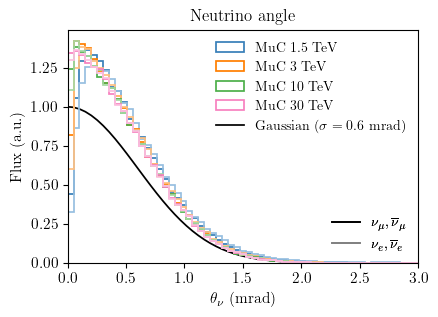

In [40]:
# bins = np.geomspace(1e-2,3, 100)
bins = np.linspace(0,3, 60)
light_factor = 0.5
LW=1.25
units = 1e3#180/np.pi
fig, ax = pt.std_fig()

kwargs = {'zorder': 2, 'lw': LW, 'histtype': 'step', 'bins': bins, 'cumulative': False, 'density': True}
def plot_curve(i):
    ax.hist(units*get_angle(col_sims[i].cco.pnumu), weights = col_sims[i].cco.weights, label = col_sims[i].design['name'], color = pt.cblind_safe_wheel[i], **kwargs)
    ax.hist(units*get_angle(col_sims[i].cco.pnue), weights = col_sims[i].cco.weights, color = pt.lighten_color(pt.cblind_safe_wheel[i],light_factor), **kwargs)

plot_curve(0)
plot_curve(1)
plot_curve(2)
plot_curve(3)
# plot_curve(4)

ax.plot(bins, np.exp(-bins**2/(2*(6e-4*units)**2)), label = 'Gaussian ($\sigma = 0.6$~mrad)', color = 'black', lw = LW, zorder = 1)
# standard legend
leg1 = ax.legend(loc = 'upper right')

# Create a new legend
dark_line = plt.Line2D([], [], color='black', lw=LW, label=r'$\nu_\mu,\overline\nu_\mu$')
light_line = plt.Line2D([], [], color='gray', lw=LW, label=r'$\nu_e,\overline\nu_e$')
leg2 = ax.legend(handles=[dark_line, light_line], loc='lower right')

plt.gca().add_artist(leg1)
plt.gca().add_artist(leg2)

ax.set_xlabel(r'$\theta_\nu$ (mrad)')
ax.set_ylabel(r'Flux (a.u.)')
# ax.set_xscale('log')
ax.set_xlim(bins.min(), bins.max())
ax.set_title(r'Neutrino angle', fontsize = 12)
plt.savefig('plots/paper_plots/neutrino_angle.jpg', bbox_inches = 'tight', dpi = 500)

## Straight segment study

In [310]:
def get_sim_with_new_Lss(l, baseline_design=col.muc_3tev, nevents=1e4):
    baseline_design['Lss'] = l
    sim = dg.SimulateDetector(design=baseline_design, N_evals=nevents, save_mem=False)
    return sim.run()
get_sim_with_new_Lss_vec = np.vectorize(get_sim_with_new_Lss)


Lss_s = np.linspace(15, 220, 50)

L_sims_1p5tev = get_sim_with_new_Lss_vec(Lss_s,baseline_design=col.muc_1p5tev,  nevents = 1e5)
L_sims_3tev = get_sim_with_new_Lss_vec(Lss_s,baseline_design=col.muc_3tev,  nevents = 1e5)
L_sims_10tev = get_sim_with_new_Lss_vec(Lss_s,baseline_design=col.muc_10tev,  nevents = 1e5)

MuC 1.5 TeV parameter set with 1.000e+05 evaluations .
1.875e+05 MC generations; took 4.75 s.
Total count: 4.69e+11 events; took 1.19 s.

MuC 1.5 TeV parameter set with 1.000e+05 evaluations .
1.875e+05 MC generations; took 4.53 s.
Total count: 4.71e+11 events; took 1.11 s.

MuC 1.5 TeV parameter set with 1.000e+05 evaluations .
1.875e+05 MC generations; took 4.54 s.
Total count: 4.14e+11 events; took 1.11 s.

MuC 1.5 TeV parameter set with 1.000e+05 evaluations .
1.875e+05 MC generations; took 4.56 s.
Total count: 3.81e+11 events; took 1.12 s.

MuC 1.5 TeV parameter set with 1.000e+05 evaluations .
1.875e+05 MC generations; took 4.61 s.
Total count: 3.57e+11 events; took 1.09 s.

MuC 1.5 TeV parameter set with 1.000e+05 evaluations .
1.875e+05 MC generations; took 4.6 s.
Total count: 3.30e+11 events; took 1.05 s.

MuC 1.5 TeV parameter set with 1.000e+05 evaluations .
1.875e+05 MC generations; took 4.49 s.
Total count: 3.12e+11 events; took 1.06 s.

MuC 1.5 TeV parameter set with 1.00

Event Distribution:
 +------------------+-------------------+------------------------+-------------------------+--------------------+--------------+
|  Detector Parts  | ν_e events (left) | anti ν_μ events (left) | anti ν_e events (right) | ν_μ events (right) | Total Events |
+------------------+-------------------+------------------------+-------------------------+--------------------+--------------+
|  muon_detector   |     5.214e+10     |       3.584e+10        |        3.915e+10        |     5.092e+10      |  1.781e+11   |
| solenoid_borders |     9.965e+08     |       6.809e+08        |        7.875e+08        |     1.008e+09      |  3.473e+09   |
|   solenoid_mid   |     1.399e+09     |       9.905e+08        |        1.155e+09        |     1.416e+09      |  4.961e+09   |
|       hcal       |     2.920e+10     |       2.033e+10        |        2.137e+10        |     2.789e+10      |  9.879e+10   |
|       ecal       |     5.976e+09     |       4.646e+09        |        4.594e+09 

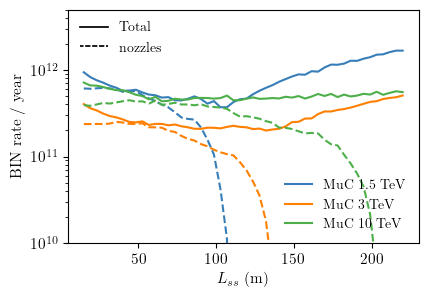

In [312]:
fig, ax = pt.std_fig()


ax.plot(Lss_s, [sim.get_face_counts().sum(axis=1)[-1] for sim in L_sims_1p5tev], label=L_sims_1p5tev[0].design['name'], color=pt.cblind_safe_wheel[0])
ax.plot(Lss_s, [sim.get_face_counts().sum(axis=1)[-1] - sim.get_face_counts().sum(axis=1)[-2] for sim in L_sims_1p5tev], color=pt.cblind_safe_wheel[0], ls='--')

ax.plot(Lss_s, [sim.get_face_counts().sum(axis=1)[-1] for sim in L_sims_3tev], label=L_sims_3tev[0].design['name'], color=pt.cblind_safe_wheel[1])
ax.plot(Lss_s, [sim.get_face_counts().sum(axis=1)[-1] - sim.get_face_counts().sum(axis=1)[-2] for sim in L_sims_3tev], color=pt.cblind_safe_wheel[1], ls='--')

ax.plot(Lss_s, [sim.get_face_counts().sum(axis=1)[-1] for sim in L_sims_10tev], label=L_sims_10tev[0].design['name'], color=pt.cblind_safe_wheel[2])
ax.plot(Lss_s, [sim.get_face_counts().sum(axis=1)[-1] - sim.get_face_counts().sum(axis=1)[-2] for sim in L_sims_10tev], color=pt.cblind_safe_wheel[2], ls='--')

# standard legend
leg1 = ax.legend(loc = 'lower right')

# Create a new legend
dark_line = plt.Line2D([], [], color='black', lw=LW, label=r'Total')
light_line = plt.Line2D([], [], color='black', lw=LW, ls=(1,(3,1)), label=r'nozzles')
leg2 = ax.legend(handles=[dark_line, light_line], loc='upper left')

plt.gca().add_artist(leg1)
# plt.gca().add_artist(leg2)

ax.set_ylim(1e10,0.5e13)

ax.set_yscale('log')
ax.set_xlabel(r'$L_{ss}$ (m)')
ax.set_ylabel(r'BIN rate / year')
fig.savefig('plots/paper_plots/Lss_sensitivity.pdf', bbox_inches = 'tight', dpi = 400)

In [126]:
## muTRISTAN polarization study

In [301]:
def get_sim_with_new_Pol(P, baseline_design=col.mut_2tev, nevents=1e4):
    baseline_design['muon_polarization'] = P
    baseline_design['beam_p0'] = 1e3
    sim = dg.SimulateDetector(design=baseline_design, N_evals=nevents, save_mem=False)
    return sim.run()

get_sim_with_new_Pol_vec = np.vectorize(get_sim_with_new_Pol)

Pols = np.linspace(0.2, 0.8, 10)

Pol_sims = get_sim_with_new_Pol_vec(Pols,  nevents = 1e6)

$\mu$TRISTAN 2 TeV parameter set with 1.000e+06 evaluations .
1.853e+06 MC generations; took 25.7 s.
Total count: 1.26e+11 events; took 22.0 s.

$\mu$TRISTAN 2 TeV parameter set with 1.000e+06 evaluations .
1.853e+06 MC generations; took 25.6 s.
Total count: 1.25e+11 events; took 21.7 s.

$\mu$TRISTAN 2 TeV parameter set with 1.000e+06 evaluations .
1.853e+06 MC generations; took 25.7 s.
Total count: 1.26e+11 events; took 21.9 s.

$\mu$TRISTAN 2 TeV parameter set with 1.000e+06 evaluations .
1.853e+06 MC generations; took 25.7 s.
Total count: 1.26e+11 events; took 21.8 s.

$\mu$TRISTAN 2 TeV parameter set with 1.000e+06 evaluations .
1.853e+06 MC generations; took 25.6 s.
Total count: 1.29e+11 events; took 21.8 s.

$\mu$TRISTAN 2 TeV parameter set with 1.000e+06 evaluations .
1.853e+06 MC generations; took 25.9 s.
Total count: 1.26e+11 events; took 21.8 s.

$\mu$TRISTAN 2 TeV parameter set with 1.000e+06 evaluations .
1.853e+06 MC generations; took 25.7 s.
Total count: 1.26e+11 events;

In [298]:
Pols

array([0.2       , 0.26666667, 0.33333333, 0.4       , 0.46666667,
       0.53333333, 0.6       , 0.66666667, 0.73333333, 0.8       ])

0.2
0.2666666666666667
0.33333333333333337
0.4
0.46666666666666673
0.5333333333333334
0.6000000000000001
0.6666666666666667
0.7333333333333334
0.8


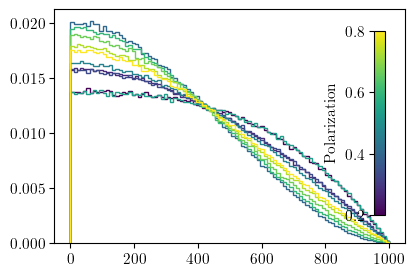

In [313]:
import matplotlib as mpl

from DarkNews import Cfourvec as Cfv

norm = mpl.colors.Normalize(vmin=Pols.min(), vmax=Pols.max())
cmap = mpl.cm.viridis
colors = cmap(np.linspace(0, 1, len(Pols)))

fig, ax = pt.std_fig()

for i in range(len(Pols)):
# for i in [0,4,9]:
    # b = np.linspace(0, 1e-3, 100)
    # plt.hist(np.arccos(Cfv.get_cosTheta(Pol_sims[i].cco.pnumu)), color=colors[i], weights=Pol_sims[i].cco.weights, bins=b, histtype='step', zorder=1-i/100)
    
    b = np.linspace(0, 1e3, 100)
    plt.hist(Pol_sims[i].cco.pnue[:,0], weights=Pol_sims[i].cco.weights, bins=b, histtype='step', color=colors[i], label=f'P = {Pols[i]:.2f}')
    print(Pol_sims[i].design['muon_polarization'])
# plt.legend()
# fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
#              cax=ax, orientation='horizontal', label='Some Units')

cax = plt.axes([0.9, 0.25, 0.025, 0.6])
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation="vertical", cax=cax, label=r'Polarization', ticklocation='left')


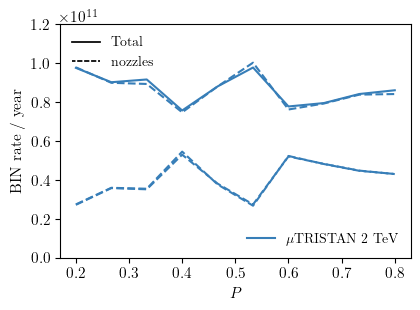

In [314]:
fig, ax = pt.std_fig()


ax.plot(Pols, [sim.get_face_counts(print_table=False).sum(axis=0)[0] for sim in Pol_sims], label=Pol_sims[0].design['name'], color=pt.cblind_safe_wheel[0])
ax.plot(Pols, [sim.get_face_counts(print_table=False).sum(axis=0)[1] for sim in Pol_sims], color=pt.cblind_safe_wheel[0], ls='--')
ax.plot(Pols, [sim.get_face_counts(print_table=False).sum(axis=0)[2] for sim in Pol_sims], color=pt.cblind_safe_wheel[0], ls='--')
ax.plot(Pols, [sim.get_face_counts(print_table=False).sum(axis=0)[3] for sim in Pol_sims], color=pt.cblind_safe_wheel[0], ls='--')

# standard legend
leg1 = ax.legend(loc = 'lower right')

# Create a new legend
dark_line = plt.Line2D([], [], color='black', lw=LW, label=r'Total')
light_line = plt.Line2D([], [], color='black', lw=LW, ls=(1,(3,1)), label=r'nozzles')
leg2 = ax.legend(handles=[dark_line, light_line], loc='upper left')

plt.gca().add_artist(leg1)
# plt.gca().add_artist(leg2)

ax.set_ylim(0,1.2e11)

# ax.set_yscale('log')
ax.set_xlabel(r'$P$')
ax.set_ylabel(r'BIN rate / year')
fig.savefig('plots/paper_plots/Pol_sensitivity.pdf', bbox_inches = 'tight', dpi = 400)